# <span style="color:black; background-color:#F5F5F5;"> 🍀 **추천 시스템 (Recommendation System) 과제** </span>

## **1. 추천 시스템 기본 개념**

### 1-1. 명시적 데이터와 암묵적 데이터의 장단점을 1가지씩 작성하시오.

<span style="color:black; background-color:#FFF099;">1-1 정답:</span>
명시적 데이터는 사용자의 당시 취향을 정확하게 반영할 수 있다. 암묵적 데이터는 데이터 수집이 쉽다는 장점이 있다.


### 1-2. 빈칸에 들어갈 말을 순서대로 작성해주세요.
자카드 유사도는 아이템 집합간의 OOO 크기를 이용하여 측정
<br>코사인 유사도는 아이템의 벡터 사이의 OO를 이용하여 측정
<br>유클리디안 거리는 아이템의 벡터 사이의 OO를 이용하여 측정
<br>피어슨 상관계수는 아이템의 벡터간 OO OO OO를 이용하여 측정

<span style="color:black; background-color:#FFF099;">1-2 정답:</span>
교집합, 각도, 거리, 선형 상관 관계


### 1-3. T/F를 골라주시고, **F일 경우 이유까지** 함께 작성해주세요.
(1) 메모리 기반 협업 필터링은 숨겨진 선호 요인이나 아이템의 특성을 반영할 수 있다.

(2) 모델 기반 협업 필터링은 행렬 분해를 통해 유저와 아이템의 잠재 요인 벡터를 만들어 평점을 예측한다.

<span style="color:black; background-color:#FFF099;">1-3 정답:</span>
(1) F 기존에 관측된 평점 정보만으로 유사도를 계산해 추천하기 때문에
(2) T


## **2. Item-Based Collaborative Filtering**

컨텐츠 기반 필터링은 '나'의 input 데이터들을 바탕으로 추천해주는 단순한 방식이며, Item-Based 협업 필터링은 Item의 평점 분포를 행렬화하여 추천해주는 것으로, 비교적 정확도가 높다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
ratings= pd.read_csv("chicken_1314th.csv", index_col='이름') # 파일 불러오기
ratings

,(BHC) 뿌링클,(BHC) 맛초킹,(BHC) 레드킹,(교촌) 교촌콤보,(교촌) 허니콤보,(교촌) 레드콤보,(굽네) 고추바사삭,(굽네) 볼케이노,(굽네) 갈비천왕,(BBQ) 황금올리브,...,(60계) 간지치킨,(바른치킨) 대세레드,(바른치킨) 현미바사삭,(바른치킨) 통곡물간장,(노랑통닭) 알싸한마늘치킨,(노랑통닭) 뿌리노랑치킨,(노랑통닭) 칼칼한청양치킨,(후참잘) 후라이드치킨,(후참잘) 양념치킨,(후참잘) 간장치킨]
이름,,,,,,,,,,,,,,,,,,,,,
윤해민,4.0,3.0,3.0,5.0,5.0,4.0,5.0,2.0,2.0,5.0,...,0.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,1.0,4.0
김윤서,3.0,2.0,1.0,3.0,3.0,3.0,3.0,1.0,0.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
황종빈,3.0,0.0,0.0,5.0,2.0,3.0,5.0,5.0,4.0,5.0,...,5.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
문건우,5.0,2.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,5.0,...,0.0,1.0,4.0,5.0,5.0,0.0,0.0,5.0,4.0,3.0
김일호,5.0,5.0,2.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0
김민지,3.0,3.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,3.0,...,3.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
김재성,2.0,0.0,0.0,4.0,4.0,3.0,5.0,0.0,0.0,5.0,...,0.0,0.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0
김찬우,1.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,0.0,5.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
김현서,1.0,0.0,0.0,3.0,4.0,3.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,4.0,0.0,0.0


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 윤해민 to 최지원
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (BHC) 뿌링클       30 non-null     float64
 1   (BHC) 맛초킹       30 non-null     float64
 2   (BHC) 레드킹       30 non-null     float64
 3   (교촌) 교촌콤보       30 non-null     float64
 4   (교촌) 허니콤보       30 non-null     float64
 5   (교촌) 레드콤보       30 non-null     float64
 6   (굽네) 고추바사삭      30 non-null     float64
 7   (굽네) 볼케이노       30 non-null     float64
 8   (굽네) 갈비천왕       30 non-null     float64
 9   (BBQ) 황금올리브     30 non-null     float64
 10  (BBQ) 핫황금올리브    30 non-null     float64
 11  (BBQ) 자메이카통다리   30 non-null     float64
 12  (네네) 오리엔탈파닭     30 non-null     float64
 13  (네네) 청양마요       30 non-null     float64
 14  (네네) 스노윙        30 non-null     float64
 15  (처갓집) 블랙라벨      30 non-null     float64
 16  (처갓집) XO양념치킨    30 non-null     float64
 17  (처갓집) 트러플슈프림    30 non-null     float64

### **2-1. 아이템 유사도 계산**

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# 유사도 계산을 위해 결측치를 0으로 대체
ratings.fillna(0, inplace=True)

# 유사도 계산
item_similarity = cosine_similarity(ratings.T) #행에 있는 벡터들의 유사도 계산이므로 .T

# 아이템 유사도 DataFrame 생성
# data는 item_similarity, index는 ratings.T.index, columns는 ratings.T.index로 지정합니다. 
item_similarity = pd.DataFrame(data = item_similarity,
                                index= ratings.T.index,
                                columns = ratings.T.index)
item_similarity.head()

,(BHC) 뿌링클,(BHC) 맛초킹,(BHC) 레드킹,(교촌) 교촌콤보,(교촌) 허니콤보,(교촌) 레드콤보,(굽네) 고추바사삭,(굽네) 볼케이노,(굽네) 갈비천왕,(BBQ) 황금올리브,...,(60계) 간지치킨,(바른치킨) 대세레드,(바른치킨) 현미바사삭,(바른치킨) 통곡물간장,(노랑통닭) 알싸한마늘치킨,(노랑통닭) 뿌리노랑치킨,(노랑통닭) 칼칼한청양치킨,(후참잘) 후라이드치킨,(후참잘) 양념치킨,(후참잘) 간장치킨]
(BHC) 뿌링클,1.000000,0.679014,0.614080,0.861323,0.876449,0.812502,0.787363,0.734992,0.744143,0.891497,...,0.542526,0.635032,0.828068,0.699375,0.733895,0.488273,0.520019,0.714772,0.640998,0.674758
(BHC) 맛초킹,0.679014,1.000000,0.739734,0.569442,0.626623,0.678951,0.624220,0.524597,0.578318,0.646687,...,0.589256,0.640464,0.552927,0.438462,0.729838,0.466690,0.542218,0.570922,0.515711,0.639602
(BHC) 레드킹,0.614080,0.739734,1.000000,0.552440,0.637866,0.648479,0.508689,0.460991,0.477283,0.541621,...,0.385872,0.382364,0.515787,0.606339,0.706259,0.565945,0.532291,0.533293,0.550344,0.568796
(교촌) 교촌콤보,0.861323,0.569442,0.552440,1.000000,0.915320,0.860250,0.826015,0.696826,0.622918,0.875526,...,0.409048,0.555745,0.868845,0.696681,0.711658,0.375813,0.364073,0.723856,0.576148,0.612809
(교촌) 허니콤보,0.876449,0.626623,0.637866,0.915320,1.000000,0.876671,0.847399,0.660719,0.661291,0.870339,...,0.366546,0.585883,0.813829,0.774044,0.718219,0.569225,0.366102,0.691652,0.547243,0.589970


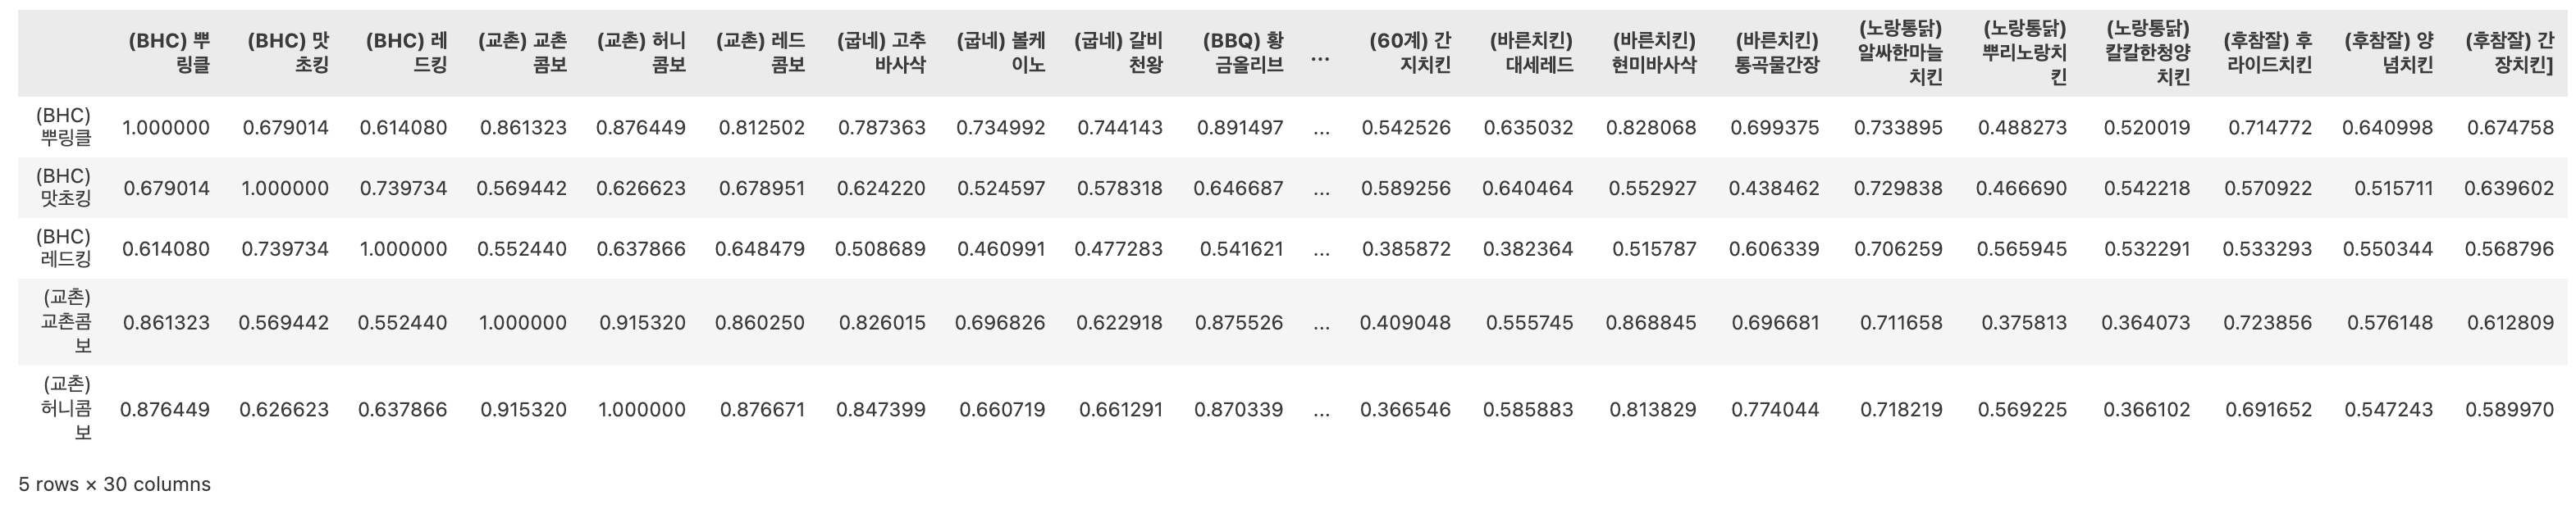

 본격적인 시작에 앞서, 여러분이 마케팅팀이라고 가정했을 때, 교촌 허니콤보와 유사한 선호도를 가진 치킨끼리 묶어서 특가 할인행사를 시행하려고 합니다!<br>
유사한 선호도 Top 3를 묶어서 특가 할인행사 대상을 선별해주세요!

In [6]:
def get_similar_item(title):
    return item_similarity[title].sort_values(ascending=False)[1:4]

get_similar_item("(교촌) 허니콤보").head(3)

(교촌) 교촌콤보    0.915320
(교촌) 레드콤보    0.876671
(BHC) 뿌링클    0.876449
Name: (교촌) 허니콤보, dtype: float64

#### **2-1-1. 특가 할인행사 대상은 어떻게 도출되었나요?**

<span style="color:black; background-color:#FFF099;">2-1-1 정답:</span>
(교촌) 교촌콤보, (교촌) 레드콤보, (BHC) 뿌링클

#### **2-1-2. 각 치킨별 추천 치킨(아이템 유사도 기준) 만들기**

In [7]:
import pandas as pd

# 치킨 리스트
chicken_list = list(item_similarity.index)

# 새로운 데이터프레임을 만들기 위한 빈 리스트 초기화
recommendations = []

# 각 치킨에 대해 유사한 항목 찾기
for chicken in chicken_list:
    similar_items = get_similar_item(chicken).head(3)
    
    # '추천 치킨'이라는 새로운 칼럼을 만들어 데이터프레임에 추가
    recommendations.append({
        'Chicken': chicken,
        'Recommendations': ', '.join(similar_items.index)
    })

# 결과 데이터프레임 생성
result_df = pd.DataFrame(recommendations)

# 결과 출력
result_df

,Chicken,Recommendations
0,(BHC) 뿌링클,"(BBQ) 황금올리브, (교촌) 허니콤보, (교촌) 교촌콤보"
1,(BHC) 맛초킹,"(BHC) 레드킹, (노랑통닭) 알싸한마늘치킨, (BHC) 뿌링클"
2,(BHC) 레드킹,"(BHC) 맛초킹, (노랑통닭) 알싸한마늘치킨, (교촌) 레드콤보"
3,(교촌) 교촌콤보,"(교촌) 허니콤보, (BBQ) 황금올리브, (바른치킨) 현미바사삭"
4,(교촌) 허니콤보,"(교촌) 교촌콤보, (교촌) 레드콤보, (BHC) 뿌링클"
5,(교촌) 레드콤보,"(교촌) 허니콤보, (교촌) 교촌콤보, (BBQ) 황금올리브"
6,(굽네) 고추바사삭,"(BBQ) 황금올리브, (교촌) 허니콤보, (교촌) 교촌콤보"
7,(굽네) 볼케이노,"(굽네) 갈비천왕, (굽네) 고추바사삭, (BBQ) 황금올리브"
8,(굽네) 갈비천왕,"(굽네) 볼케이노, (BHC) 뿌링클, (바른치킨) 대세레드"
9,(BBQ) 황금올리브,"(굽네) 고추바사삭, (BHC) 뿌링클, (교촌) 교촌콤보"


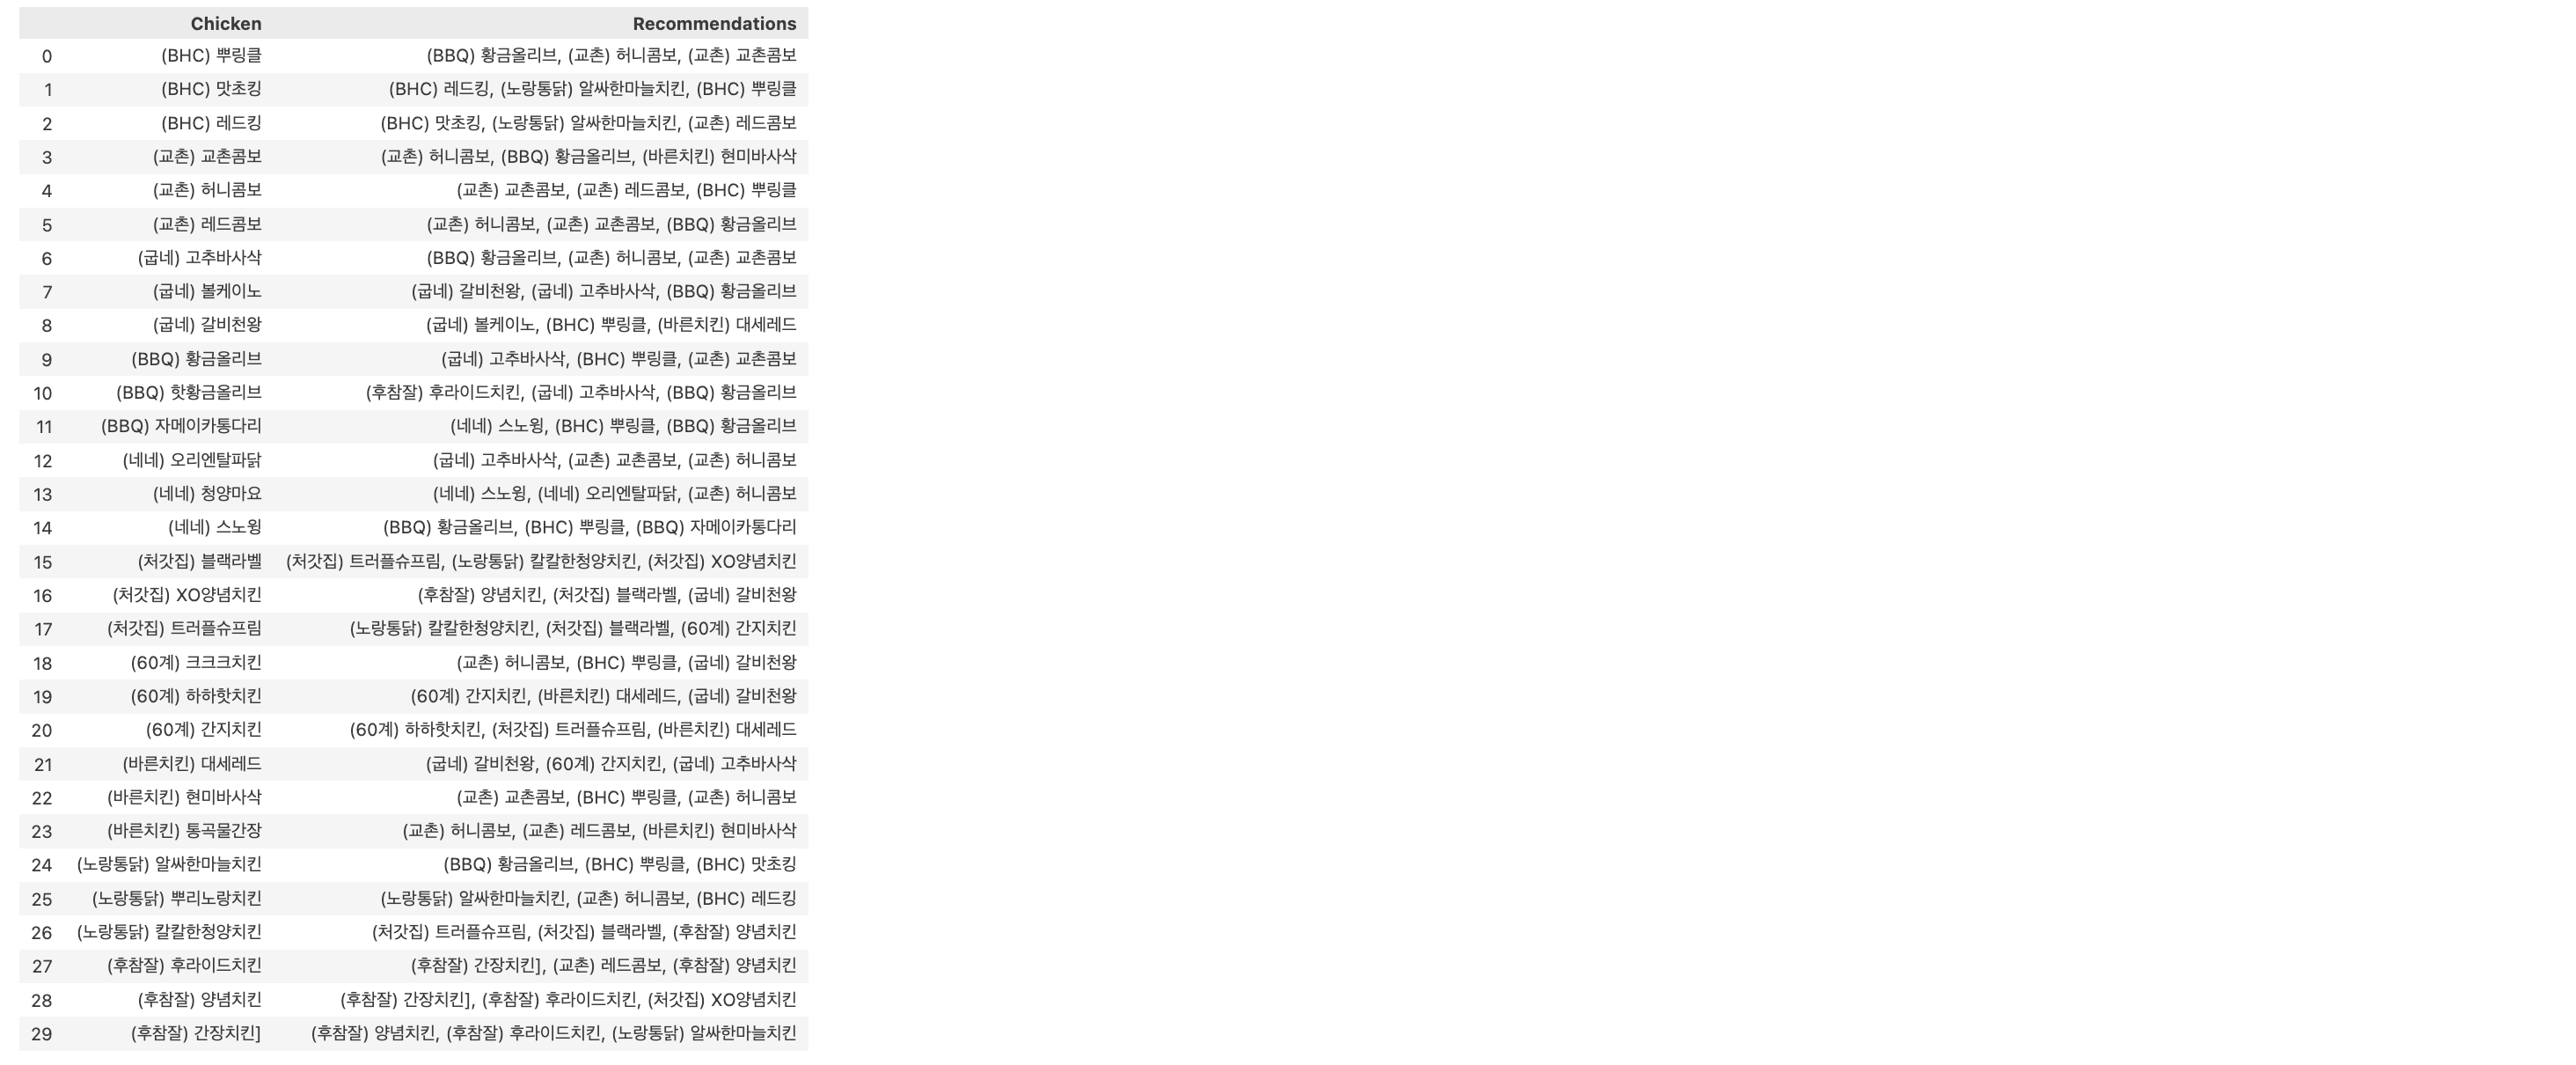

### **2-2. 아이템 평점 예측**

In [8]:
# 아이템별 평점 예측 함수
import numpy as np

def predict_rating(ratings, item_similarity):
    sum_sr = ratings @ item_similarity
    sum_s_abs = np.array([np.abs(item_similarity).sum(axis=1)])
    ratings_pred =  sum_sr / sum_s_abs
    return ratings_pred

# 아이템별 평점 예측
ratings_pred = predict_rating(ratings.values, item_similarity.values) 

# 예측한 평점에 대한 DataFrame 생성
ratings_pred_matrix = pd.DataFrame(data = ratings_pred,
                                    index = ratings.index,
                                    columns = ratings.columns)
ratings_pred_matrix.head(5)

,(BHC) 뿌링클,(BHC) 맛초킹,(BHC) 레드킹,(교촌) 교촌콤보,(교촌) 허니콤보,(교촌) 레드콤보,(굽네) 고추바사삭,(굽네) 볼케이노,(굽네) 갈비천왕,(BBQ) 황금올리브,...,(60계) 간지치킨,(바른치킨) 대세레드,(바른치킨) 현미바사삭,(바른치킨) 통곡물간장,(노랑통닭) 알싸한마늘치킨,(노랑통닭) 뿌리노랑치킨,(노랑통닭) 칼칼한청양치킨,(후참잘) 후라이드치킨,(후참잘) 양념치킨,(후참잘) 간장치킨]
이름,,,,,,,,,,,,,,,,,,,,,
윤해민,2.813131,2.635186,2.736353,2.959306,2.940450,2.884952,2.853276,2.720538,2.586763,2.881503,...,2.197128,2.474259,2.904545,3.013672,2.780781,2.470168,2.178502,2.898328,2.627965,2.805027
김윤서,1.206672,1.118720,1.113511,1.286767,1.282603,1.235790,1.238965,1.134940,1.039052,1.253157,...,0.924762,1.052898,1.245100,1.239214,1.134394,1.043422,0.865672,1.156827,1.023043,1.080292
황종빈,2.292897,2.102015,1.969440,2.389817,2.309779,2.284910,2.404244,2.482967,2.374549,2.364627,...,2.454695,2.399999,2.380755,2.135352,2.100261,1.993271,1.905501,2.314549,2.095475,2.136897
문건우,3.078914,2.837189,2.980396,3.180966,3.150417,3.091909,3.025248,2.992673,2.880987,3.084558,...,2.490040,2.698090,3.133332,3.301914,3.018012,2.682500,2.525647,3.164162,3.005711,3.089796
김일호,3.257699,3.306936,3.202000,3.212756,3.257244,3.257604,3.256219,3.243507,3.258812,3.240110,...,3.312086,3.266266,3.229655,3.267173,3.231281,3.188579,3.199274,3.155883,3.095312,3.132098


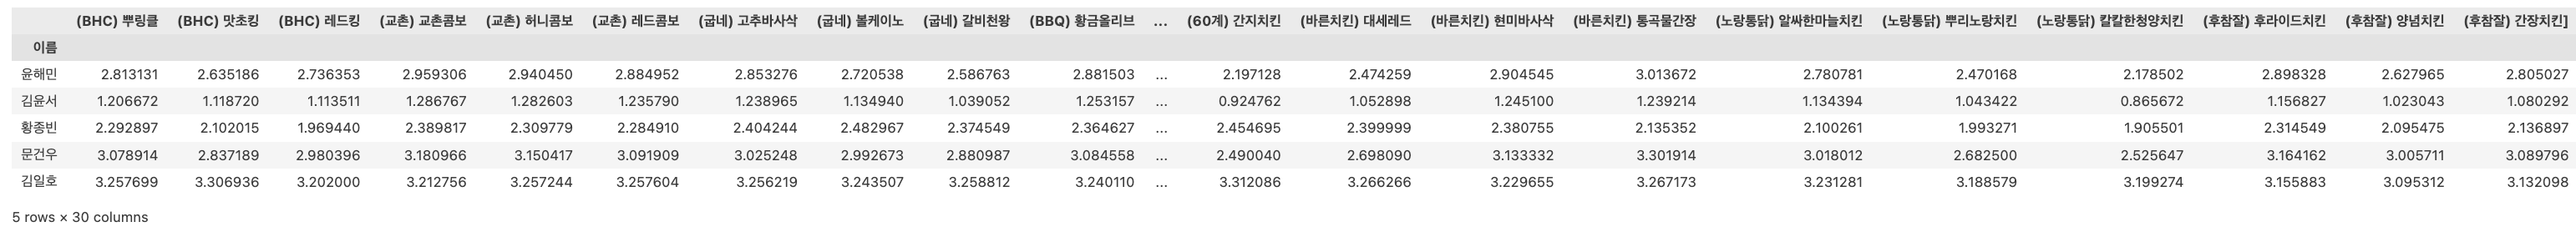

#### **2-2-1. 평점 예측 성능 평가**

지난 시간에 학습한 평가지표를 활용해서 성능을 평가해보고자 합니다.

- **MAE(Mean Absolute Error)** : 모델의 예측값과 실제값의 차이의 절대값의 평균, 절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표이다.

In [9]:
# 평점 예측 성능 평가 함수 (MAE)
from sklearn.metrics import median_absolute_error

def get_mae(pred, actual):
    pred=pred[actual.nonzero()].flatten()
    actual=actual[actual.nonzero()].flatten()
    return median_absolute_error(pred, actual)

MAE=get_mae(ratings_pred, ratings.values) # 위에서 정의한 예측값을 넣으세요!
print(f'아이템 기반 모든 인접 이웃 MAE: {MAE:.4f}')

아이템 기반 모든 인접 이웃 MAE: 1.2038


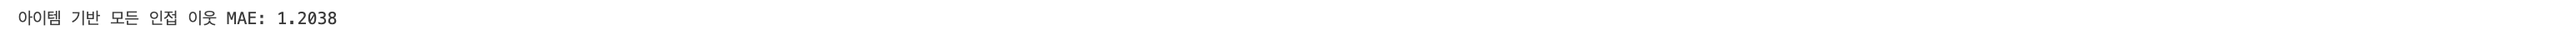

- **MSE(Mean Squared Error)** : 제곱을 하기 때문에 MAE와는 다르게 모델의 예측값과 실제값 차이의 면적의(제곱)합, 제곱을 하기 때문에 특이치(Outlier)에 민감하다.

In [10]:
# 평점 예측 성능 평가 함수 (MSE)
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

MSE = get_mse(ratings_pred, ratings.values)
print(f'아이템 기반 모든 인접 이웃 MSE: {MSE:.4f}')

아이템 기반 모든 인접 이웃 MSE: 2.6334


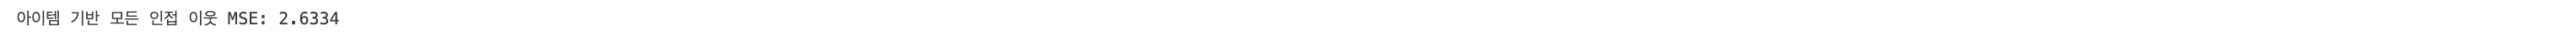

- **RMSE(Root Mean Squared Error)**: MSE에 루트를 씌워 사용, RMSE를 사용하면 오류 지표를 실제값과 유사한 단위로 다시 변환하여 해석을 쉽게한다.

In [11]:
# 평점 예측 성능 평가 함수 (RMSE)
#squared=False 하면 RMSE, 안하면 MSE
from sklearn.metrics import mean_squared_error

def get_rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return np.sqrt(mean_squared_error(pred, actual))  # 제곱근으로 RMSE 직접 계산

RMSE = get_rmse(ratings_pred, ratings.values)
print(f'아이템 기반 모든 인접 이웃 RMSE: {RMSE:.4f}')

아이템 기반 모든 인접 이웃 RMSE: 1.6228


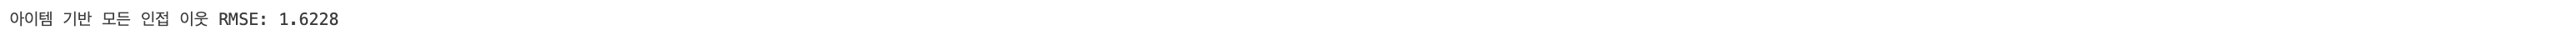

#### **2-2-2. 치킨 추천**
본인에게 치킨을 추천해볼까요? -> ***에 "김현서"와 같이 입력해주세요!

In [12]:
# 본인이 높은 평점을 준 치킨
user_rated_food = ratings.loc['조수현', :] # 이름을 입력해봅시다
user_rated_food[user_rated_food > 0].sort_values(ascending=False)[:5]

(교촌) 허니콤보        5.0
(바른치킨) 통곡물간장     5.0
(교촌) 레드콤보        4.0
(BHC) 레드킹        4.0
(노랑통닭) 뿌리노랑치킨    3.0
Name: 조수현, dtype: float64

In [13]:
# 본인이 평가하지 않은 치킨

def never_try_food(ratings, userId):
    user_rating = ratings.loc[userId,:]
    never_food_list = user_rating[user_rating == 0].index.tolist()
    food_list = ratings.columns.tolist()
    never_list = [food for food in food_list if food in never_food_list]
    return never_list

unrated_food = never_try_food(ratings, '조수현') # 이름을 입력해볼까요?
unrated_food

['(BHC) 뿌링클',
 '(교촌) 교촌콤보',
 '(굽네) 고추바사삭',
 '(굽네) 볼케이노',
 '(BBQ) 황금올리브',
 '(BBQ) 핫황금올리브',
 '(BBQ) 자메이카통다리',
 '(네네) 스노윙',
 '(처갓집) 블랙라벨',
 '(처갓집) XO양념치킨',
 '(처갓집) 트러플슈프림',
 '(60계) 크크크치킨',
 '(60계) 하하핫치킨',
 '(60계) 간지치킨',
 '(바른치킨) 대세레드',
 '(바른치킨) 현미바사삭',
 '(노랑통닭) 알싸한마늘치킨',
 '(노랑통닭) 칼칼한청양치킨',
 '(후참잘) 후라이드치킨',
 '(후참잘) 양념치킨',
 '(후참잘) 간장치킨]']

In [15]:
# 본인이 평가하지 않은 치킨에 대해 직접 예측한 평점을 바탕으로 음식 추천!

def recomm_food_by_userid(pred_df, userId, never_list, top_n=10): 
    recomm_food = pred_df.loc[userId, never_list].sort_values(ascending=False)[:top_n]
    return recomm_food

recommend_food = recomm_food_by_userid(ratings_pred_matrix, '조수현', unrated_food, top_n=5) # 이름을 입력해보아요
recommend_food

(교촌) 교촌콤보         0.928035
(바른치킨) 현미바사삭      0.903737
(노랑통닭) 알싸한마늘치킨    0.893306
(BHC) 뿌링클         0.884611
(BBQ) 황금올리브       0.881474
Name: 조수현, dtype: float64

In [16]:
name = list(ratings.index)
best_recommend=[]
best_score =[]
for word in name:
    user_rated_food = ratings.loc[word, :]
    user_rated_food[user_rated_food > 0].sort_values(ascending=False)[:5]
    unrated_food = never_try_food(ratings, word)
    best_recommend.append(list(recomm_food_by_userid(ratings_pred_matrix, word, unrated_food, top_n=1).index))    
    best_score.append(list(recomm_food_by_userid(ratings_pred_matrix, word, unrated_food, top_n=1).values))    
    
present1 = pd.DataFrame({'이름':name,'추천치킨_Item':best_recommend,'평점_Item':best_score})
present1

,이름,추천치킨_Item,평점_Item
0,윤해민,[(네네) 청양마요],[2.7845074097045823]
1,김윤서,[(바른치킨) 통곡물간장],[1.2392143744041775]
2,황종빈,[(네네) 스노윙],[2.145822774395584]
3,문건우,[(네네) 청양마요],[2.9236493097664855]
4,김일호,[(BBQ) 자메이카통다리],[3.1136954993471178]
5,김민지,[(노랑통닭) 칼칼한청양치킨],[1.4403915344876472]
6,김재성,[(네네) 청양마요],[1.4937073194997366]
7,김찬우,[(네네) 오리엔탈파닭],[0.7274102613670235]
8,김현서,[(바른치킨) 통곡물간장],[1.7920560355768518]
9,노승혁,[(바른치킨) 통곡물간장],[1.2241481071172773]


## **3. User-based Collaborative Filtering**

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

### **3-1. Data set 살펴보기**

In [18]:
ratings = pd.read_csv("chicken_1314th.csv",index_col='이름')
ratings.head()

,(BHC) 뿌링클,(BHC) 맛초킹,(BHC) 레드킹,(교촌) 교촌콤보,(교촌) 허니콤보,(교촌) 레드콤보,(굽네) 고추바사삭,(굽네) 볼케이노,(굽네) 갈비천왕,(BBQ) 황금올리브,...,(60계) 간지치킨,(바른치킨) 대세레드,(바른치킨) 현미바사삭,(바른치킨) 통곡물간장,(노랑통닭) 알싸한마늘치킨,(노랑통닭) 뿌리노랑치킨,(노랑통닭) 칼칼한청양치킨,(후참잘) 후라이드치킨,(후참잘) 양념치킨,(후참잘) 간장치킨]
이름,,,,,,,,,,,,,,,,,,,,,
윤해민,4.0,3.0,3.0,5.0,5.0,4.0,5.0,2.0,2.0,5.0,...,0.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,1.0,4.0
김윤서,3.0,2.0,1.0,3.0,3.0,3.0,3.0,1.0,0.0,3.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
황종빈,3.0,0.0,0.0,5.0,2.0,3.0,5.0,5.0,4.0,5.0,...,5.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
문건우,5.0,2.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,5.0,...,0.0,1.0,4.0,5.0,5.0,0.0,0.0,5.0,4.0,3.0
김일호,5.0,5.0,2.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0


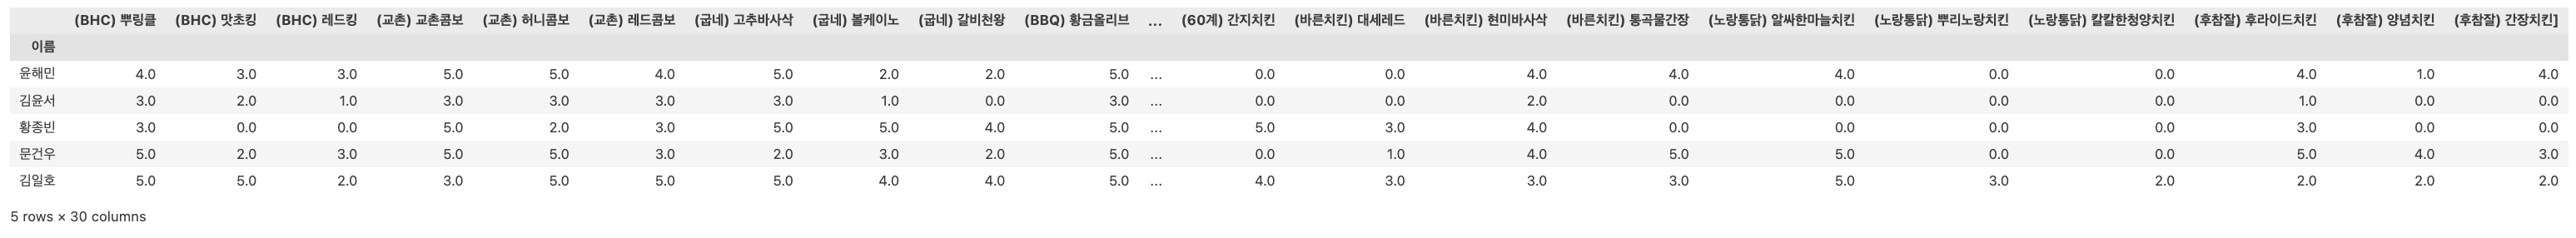

### **3-2. 사용자 유사도 계산**

In [21]:
# 유사도 계산하기 (경험 없음은 0으로 대체 되어 있음)
user_similarity = cosine_similarity(ratings)

# 사용자 유사도 DataFrame 생성
# data는 user_similarity, index는 ratings.index, columns는 ratings.index로 지정합니다. 
user_similarity = pd.DataFrame(data = user_similarity,
                                index= ratings.index,
                                columns = ratings.index)
user_similarity.head()

이름,윤해민,김윤서,황종빈,문건우,김일호,김민지,김재성,김찬우,김현서,노승혁,...,방상운,신영은,안가은,이지영,이채원,장유경,조민정,조수현,최윤지,최지원
이름,,,,,,,,,,,,,,,,,,,,,
윤해민,1.000000,0.709053,0.680329,0.896446,0.779044,0.548023,0.781182,0.500204,0.745468,0.735147,...,0.770989,0.747558,0.621573,0.604990,0.723434,0.791437,0.797040,0.461973,0.503749,0.858128
김윤서,0.709053,1.000000,0.575310,0.652891,0.655866,0.520918,0.716531,0.507660,0.703272,0.829005,...,0.737163,0.658586,0.643672,0.580818,0.564042,0.763558,0.695631,0.432427,0.315405,0.776312
황종빈,0.680329,0.575310,1.000000,0.663532,0.746592,0.579423,0.611843,0.578087,0.557760,0.490887,...,0.746772,0.583423,0.542397,0.477779,0.624269,0.576134,0.653173,0.180637,0.602433,0.627467
문건우,0.896446,0.652891,0.663532,1.000000,0.790752,0.574835,0.701272,0.439350,0.656231,0.645710,...,0.776910,0.752874,0.620980,0.490511,0.750656,0.678556,0.729446,0.442445,0.533471,0.850732
김일호,0.779044,0.655866,0.746592,0.790752,1.000000,0.776091,0.652377,0.556901,0.588680,0.695436,...,0.851166,0.661226,0.582711,0.524984,0.735658,0.643432,0.759258,0.471223,0.522119,0.707360


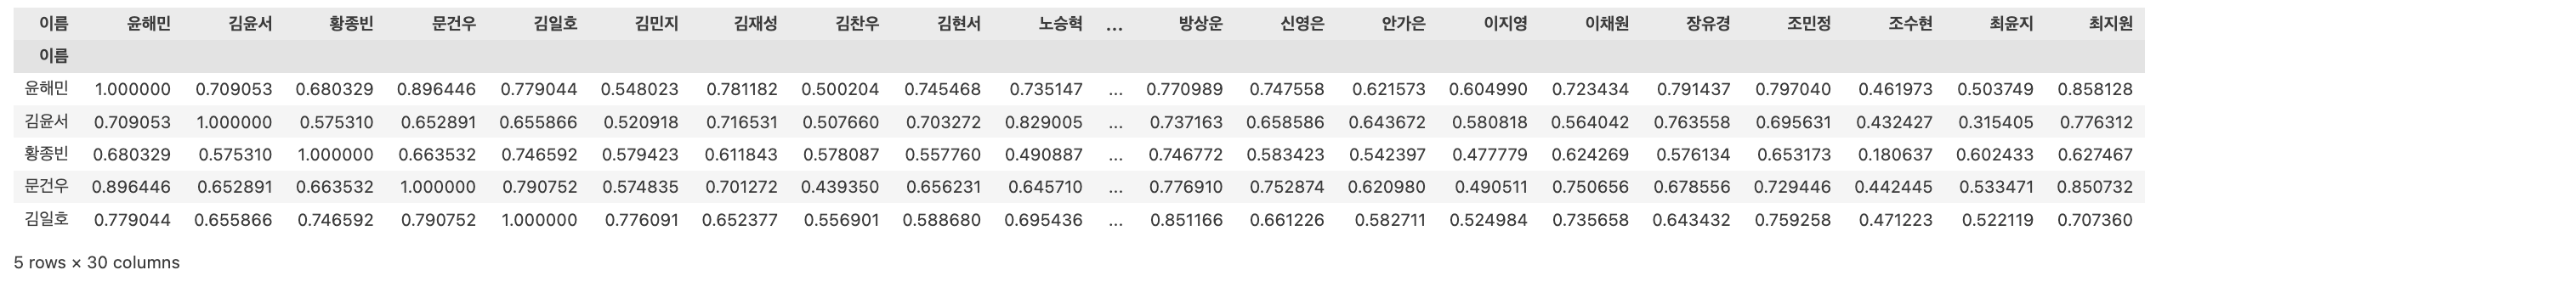

#### **3-2-1. 사용자별 유사도가 높은 상위 사용자 5명 추출**

In [22]:
def find_n_neighbors(n):
    user_neighbor = user_similarity.apply(lambda x: pd.Series(x.sort_values(ascending=False).iloc[1:n+1].index, 
                                                index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return user_neighbor

user_neighbor = find_n_neighbors(5)
user_neighbor.head()

,top1,top2,top3,top4,top5
이름,,,,,
윤해민,문건우,최지원,구준모,이종현,조민정
김윤서,노승혁,이종현,류한결,최지원,장유경
황종빈,문선아,방상운,김일호,엄태림,권도영
문건우,윤해민,구준모,최지원,권도영,김일호
김일호,구준모,방상운,문건우,윤해민,김민지


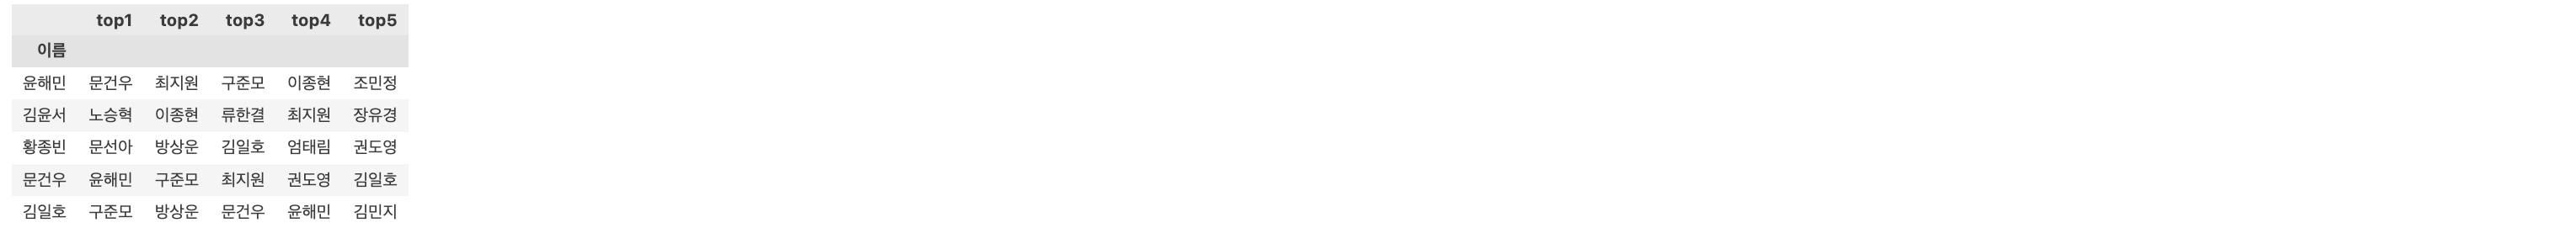

#### **3-2-2. 사용자별 유사도를 기준으로, 예측 평가 점수 산출**

In [23]:
def predict_ratings_all_users(user_neighbor, ratings):
    predict_ratings_all = pd.DataFrame(index = ratings.index, columns = ratings.columns)

    for user in ratings.index:
        for item in ratings.columns:
            if ratings.loc[user, item] == 0:
                neighbor_ratings = ratings.loc[user_neighbor.loc[user], item]
                predict_ratings_all.loc[user, item] = np.dot(neighbor_ratings, user_similarity.loc[user, user_neighbor.loc[user]]) / sum(np.abs(user_similarity.loc[user, user_neighbor.loc[user]]))
            else:
                predict_ratings_all.loc[user, item] = ratings.loc[user, item]

    return predict_ratings_all

# 유사도 상위 5명 기준으로 계산
user_neighbor = find_n_neighbors(5)
predicted_ratings_all = predict_ratings_all_users(user_neighbor, ratings)
ratings_predicted_all = ratings.where(ratings != 0, predicted_ratings_all)
ratings_predicted_all.head()

,(BHC) 뿌링클,(BHC) 맛초킹,(BHC) 레드킹,(교촌) 교촌콤보,(교촌) 허니콤보,(교촌) 레드콤보,(굽네) 고추바사삭,(굽네) 볼케이노,(굽네) 갈비천왕,(BBQ) 황금올리브,...,(60계) 간지치킨,(바른치킨) 대세레드,(바른치킨) 현미바사삭,(바른치킨) 통곡물간장,(노랑통닭) 알싸한마늘치킨,(노랑통닭) 뿌리노랑치킨,(노랑통닭) 칼칼한청양치킨,(후참잘) 후라이드치킨,(후참잘) 양념치킨,(후참잘) 간장치킨]
이름,,,,,,,,,,,,,,,,,,,,,
윤해민,4.0,3.0,3.0,5.0,5.0,4.0,5.0,2.0,2.0,5.0,...,0.398287,1.376373,4.0,4.0,4.0,0.398287,0.59743,4.0,1.0,4.0
김윤서,3.0,2.0,1.0,3.0,3.0,3.0,3.0,1.0,0.583476,3.0,...,0.0,0.191296,2.0,1.574947,1.780444,0.0,0.0,1.0,0.583476,0.583476
황종빈,3.0,2.225072,1.009079,5.0,2.0,3.0,5.0,5.0,4.0,5.0,...,5.0,3.0,4.0,0.60536,2.018109,1.213429,0.605408,3.0,2.204586,2.000187
문건우,5.0,2.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,5.0,...,1.161692,1.0,4.0,5.0,5.0,0.975525,0.99787,5.0,4.0,3.0
김일호,5.0,5.0,2.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0


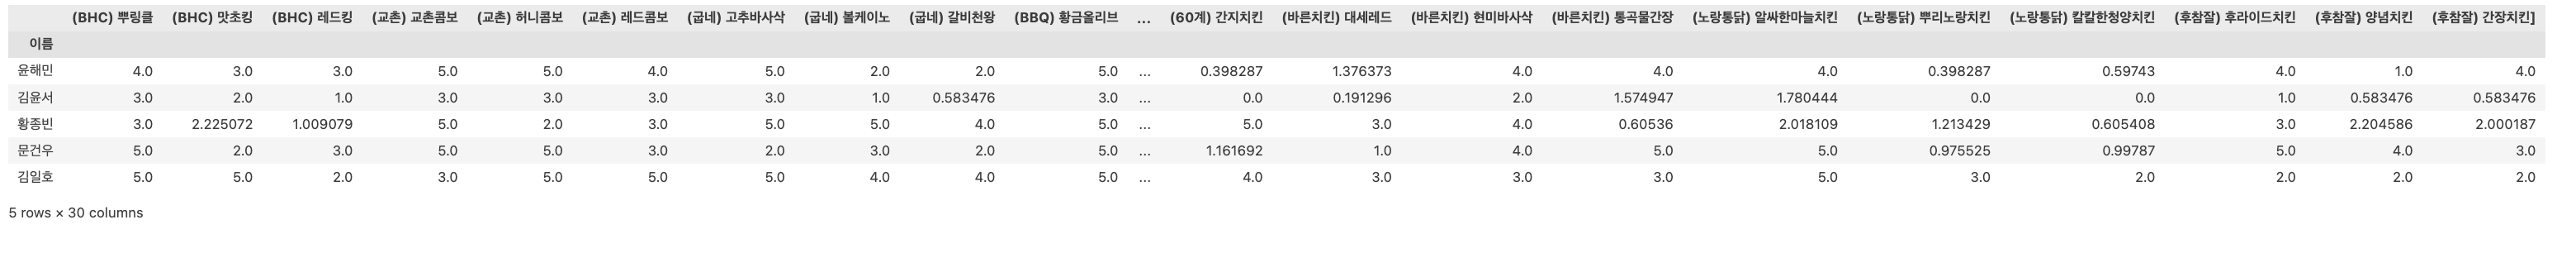

#### **3-2-3. 버디조 회식 시 치킨 메뉴 추천**
버디조 회식 때 어떤 치킨을 먹는 것이 좋을까요?

In [24]:
# 버디조 이름 입력
buddy_group = input("버디조의 이름을 입력하세요. (콤마로 구분): ")
buddy_group = buddy_group.split(',')
for i in range(len(buddy_group)):
    buddy_group[i] = buddy_group[i].strip()
print("버디조: ", buddy_group)

버디조:  ['엄태림', '김일호', '조민정', '조수현', '최윤지']


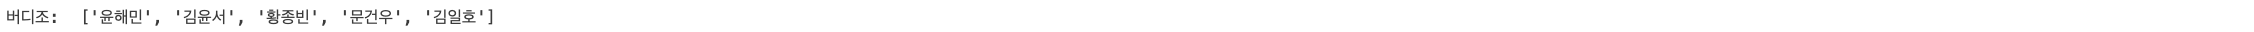

#### **3-2-4. buddy_group 데이터 추출**

In [25]:
# buddy_group의 구성원들의 예측 평가 점수를 추출
buddy_group_ratings_predicted_all = ratings_predicted_all.loc[buddy_group]

# 각 열의 평균을 구해 새로운 행으로 추가
average_ratings_predicted_all = buddy_group_ratings_predicted_all.mean()
average_ratings_predicted_all = pd.DataFrame(average_ratings_predicted_all, columns=['평균 평가 점수']).transpose()

# 기존 데이터프레임에 추가
result_with_average = pd.concat([average_ratings_predicted_all, buddy_group_ratings_predicted_all])
result_with_average.head(len(buddy_group)+1)

,(BHC) 뿌링클,(BHC) 맛초킹,(BHC) 레드킹,(교촌) 교촌콤보,(교촌) 허니콤보,(교촌) 레드콤보,(굽네) 고추바사삭,(굽네) 볼케이노,(굽네) 갈비천왕,(BBQ) 황금올리브,...,(60계) 간지치킨,(바른치킨) 대세레드,(바른치킨) 현미바사삭,(바른치킨) 통곡물간장,(노랑통닭) 알싸한마늘치킨,(노랑통닭) 뿌리노랑치킨,(노랑통닭) 칼칼한청양치킨,(후참잘) 후라이드치킨,(후참잘) 양념치킨,(후참잘) 간장치킨]
평균 평가 점수,3.308538,2.264722,1.702565,2.560578,4.2,3.437852,3.405266,2.818167,3.0,3.903536,...,1.664843,2.478952,2.212331,2.355468,2.551779,1.691458,0.589109,2.328954,1.373119,1.759979
엄태림,2.0,1.970843,0.793656,2.0,4.0,3.0,5.0,4.0,4.0,3.0,...,1.817902,4.0,1.615752,0.777339,1.56213,0.577414,0.384943,2.603172,0.965877,1.565649
김일호,5.0,5.0,2.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,3.0,3.0,3.0,5.0,3.0,2.0,2.0,2.0,2.0
조민정,2.0,3.0,1.190019,2.0,3.0,3.0,2.0,2.0,2.0,3.0,...,0.778372,3.0,1.0,1.0,3.0,1.177984,0.194593,3.0,2.027322,3.0
조수현,3.772637,1.0,4.0,3.802891,5.0,4.0,2.026328,1.090835,1.0,3.724828,...,0.732013,1.152893,3.393668,5.0,1.846917,3.0,0.366007,1.940678,0.545418,1.08365
최윤지,3.770052,0.352768,0.529152,2.0,4.0,2.189261,3.0,3.0,4.0,4.792853,...,0.995927,1.241868,2.052237,2.0,1.349848,0.701892,0.0,2.100918,1.326978,1.150593


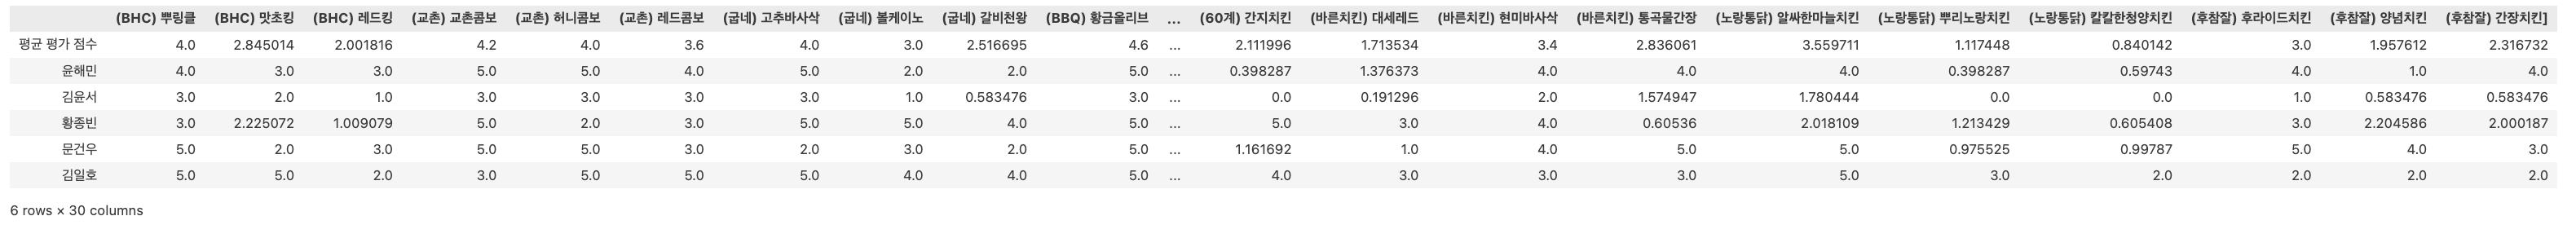

#### **3-2-5. 상위 3개 항목 도출**

In [26]:
#'평균 평가 점수'를 기준으로 내림차순 정렬하여 상위 3개 항목 선택
buddy_group_top3 = result_with_average.sort_values(by='평균 평가 점수', axis=1, ascending=False).iloc[:, :3]
buddy_group_top3.head(len(buddy_group)+1)

,(교촌) 허니콤보,(BBQ) 황금올리브,(교촌) 레드콤보
평균 평가 점수,4.2,3.903536,3.437852
엄태림,4.0,3.0,3.0
김일호,5.0,5.0,5.0
조민정,3.0,3.0,3.0
조수현,5.0,3.724828,4.0
최윤지,4.0,4.792853,2.189261


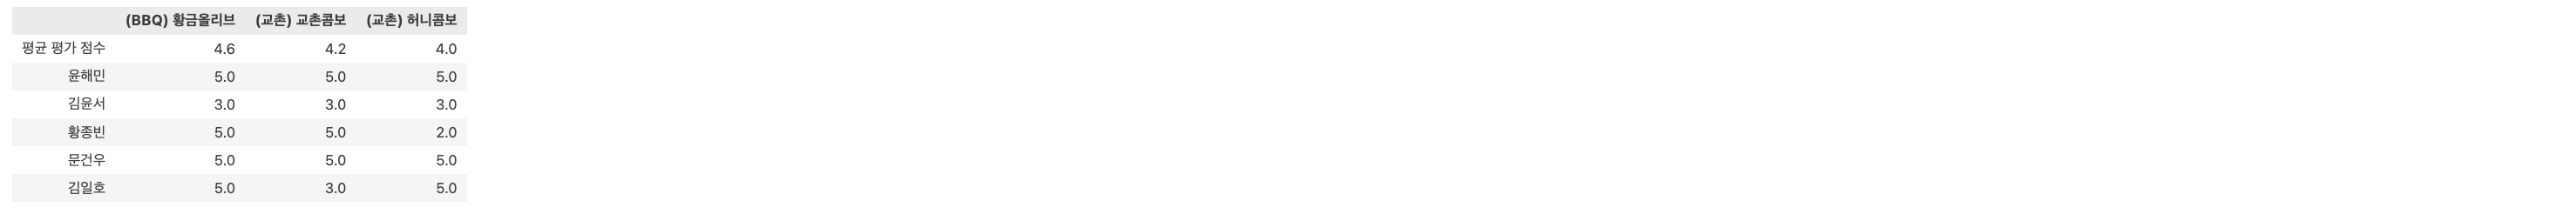

# **🤓 수고하셨습니다~**